In [124]:
import requests

## Get the matchId from FotMob match url
params = {
    'matchId': '4448111',
}

response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)

In [2]:
data = response.json()

In [4]:
shotmap = data['content']['shotmap']['shots']

In [16]:
shotmap[10]

{'id': 2691678375,
 'eventType': 'Post',
 'teamId': 8456,
 'playerId': 737066,
 'playerName': 'Erling Haaland',
 'x': 94.09649122639999,
 'y': 26.6321875,
 'min': 55,
 'minAdded': None,
 'isBlocked': False,
 'isOnTarget': False,
 'blockedX': None,
 'blockedY': None,
 'goalCrossedY': 37.2025,
 'goalCrossedZ': 2.476,
 'expectedGoals': 0.15704402327537537,
 'expectedGoalsOnTarget': None,
 'shotType': 'LeftFoot',
 'situation': 'RegularPlay',
 'period': 'SecondHalf',
 'isOwnGoal': False,
 'onGoalShot': {'x': 0.15277777777777768,
  'y': 0.655026455026455,
  'zoomRatio': 1},
 'isSavedOffLine': False,
 'isFromInsideBox': True,
 'firstName': 'Erling',
 'lastName': 'Haaland',
 'fullName': 'Erling Haaland',
 'teamColor': '#69A8D8'}

In [6]:
import pandas as pd

df = pd.DataFrame(shotmap)

In [7]:
df.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor
0,2691635575,AttemptSaved,10260,1203665,Alejandro Garnacho,91.000000,21.687134,9,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 1.3429232804232825, 'y': 0.2802840420634...",False,True,Alejandro,Garnacho,Alejandro Garnacho,#C70101
1,2691636381,Miss,8456,815006,Phil Foden,104.336207,41.945937,10,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 0, 'y': 0.21262333295883812, 'zoomRatio'...",False,True,Phil,Foden,Phil Foden,#69A8D8
2,2691644847,AttemptSaved,10260,843099,Scott McTominay,92.800000,40.133333,21,NaN,True,...,RegularPlay,FirstHalf,False,"{'x': 1.121031746031747, 'y': 0.28368142439153...",False,True,Scott,McTominay,Scott McTominay,#C70101
3,2691650853,Goal,10260,1203665,Alejandro Garnacho,98.245614,32.932500,30,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 1.2420634920634936, 'y': 0.0968253963492...",False,True,Alejandro,Garnacho,Alejandro Garnacho,#C70101
4,2691656473,AttemptSaved,8456,488139,Bernardo Silva,75.727670,24.419618,37,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 1.0605158730158726, 'y': 0.1392926754497...",False,False,Bernardo,Silva,Bernardo Silva,#69A8D8


In [14]:
df.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [17]:
df_shots = df[['goalCrossedY', 'goalCrossedZ','eventType']]

In [21]:
df_shots

,goalCrossedY,goalCrossedZ,eventType
0,32.703750,1.059474,AttemptSaved
1,38.620476,0.982421,Miss
2,33.542500,1.072316,AttemptSaved
3,33.085000,0.366000,Goal
4,33.771250,0.526526,AttemptSaved
5,19.655287,0.982421,Miss
6,32.780000,0.327474,Goal
7,34.686250,1.220000,AttemptSaved
8,36.897500,4.940966,Miss
9,25.244688,0.089895,Miss


In [19]:
df_shots['eventType'].unique()

array(['AttemptSaved', 'Miss', 'Goal', 'Post'], dtype=object)

In [85]:
goal_mask = df_shots.eventType == 'AttemptSaved'
print(df_shots[goal_mask].goalCrossedY)

0     32.70375
2     33.54250
4     33.77125
7     34.68625
11    35.98250
12    31.02625
14    34.76250
18    31.48375
20    36.28750
22    36.59250
23    32.62750
24    34.30500
26    35.44875
29    34.00000
Name: goalCrossedY, dtype: float64


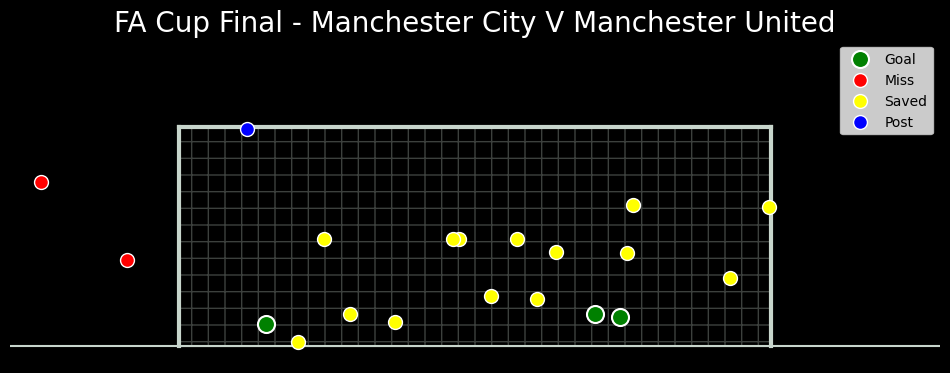

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(12, 4.2)

#plt.gca().invert_xaxis()

# Goal post lines (shifted to the left by 1 unit)
plt.plot([28, 39], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30, 37], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37, 37], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30, 30], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
plt.gca().add_patch(Rectangle((30, 0), 7, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

plt.gca().invert_yaxis()
#Tidy Axes
plt.axis('off')

plt.title("FA Cup Final - Manchester City V Manchester United",color='white', fontsize=20)

goal_mask = df_shots.eventType == 'Goal'
sc1 = plt.scatter(68 - df_shots[goal_mask].goalCrossedY, df_shots[goal_mask].goalCrossedZ,marker='o', color='green', label='Goal',s=150,zorder=2,edgecolors = 'white',linewidths=1.5)

miss_mask = df_shots.eventType == 'Miss'
sc2 = plt.scatter(68 - df_shots[miss_mask].goalCrossedY, df_shots[miss_mask].goalCrossedZ,marker='o', color='red', label='Miss',s=100,zorder=2,edgecolors = 'white',linewidths=1)

saved_mask = df_shots.eventType == 'AttemptSaved'
sc3 = plt.scatter(68 - df_shots[saved_mask].goalCrossedY, df_shots[saved_mask].goalCrossedZ,marker='o', color='yellow', label='Saved',s=100,zorder=2,edgecolors = 'white',linewidths=1)

post_mask = df_shots.eventType == 'Post'
sc4 = plt.scatter(68 - df_shots[post_mask].goalCrossedY, df_shots[post_mask].goalCrossedZ,marker='o', color='blue', label='Post',s=100,zorder=2,edgecolors = 'white',linewidths=1)

plt.ylim(ymin=-0.2, ymax=3.5)
plt.xlim(xmin=28, xmax=39)
plt.legend()

plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/OnGoalShotMap.png',dpi=300,bbox_inches = 'tight',facecolor='black')